In [ ]:
%%capture
# Install the library with the pretrained weights
!pip install git+https://github.com/facebookresearch/r3m.git zarr

In [ ]:
# %%capture
## Download the data
# The simulation data, low fidelity
!gdown https://drive.google.com/uc?id=1oC7-_YVvl9TpvMPR-9IMjyXkSABCST92

# The simulation data, higher fidelity
!gdown https://drive.google.com/uc?id=1PfbAtpVgwjO1EQqP8Av7Q5IPstP-hX2I

# The real data
!gdown https://drive.google.com/uc?id=12eWy7dEz-Y0WYcv9GUiuT_QqwSW_CzKW

Downloading...
From (original): https://drive.google.com/uc?id=1oC7-_YVvl9TpvMPR-9IMjyXkSABCST92
From (redirected): https://drive.google.com/uc?id=1oC7-_YVvl9TpvMPR-9IMjyXkSABCST92&confirm=t&uuid=565ea56d-c9e0-46e1-8b9c-3f9215131847
To: /content/one_leg_low_sim.zarr.zip
100% 1.43G/1.43G [00:29<00:00, 49.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1PfbAtpVgwjO1EQqP8Av7Q5IPstP-hX2I
From (redirected): https://drive.google.com/uc?id=1PfbAtpVgwjO1EQqP8Av7Q5IPstP-hX2I&confirm=t&uuid=15a20da8-adc4-48b7-bd46-a1ec8dc66953
To: /content/one_leg_med_sim.zarr.zip
100% 1.70G/1.70G [00:25<00:00, 66.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=12eWy7dEz-Y0WYcv9GUiuT_QqwSW_CzKW
From (redirected): https://drive.google.com/uc?id=12eWy7dEz-Y0WYcv9GUiuT_QqwSW_CzKW&confirm=t&uuid=c993e508-9a64-413f-8573-c3dc6044a938
To: /content/one_leg_low_real.zarr.zip
100% 7.36G/7.36G [02:13<00:00, 55.1MB/s]


In [ ]:
# %%capture
# Unzip the files so we can access the contents
# Remove the zip files as they're not needed anymore
!unzip -o /content/one_leg_low_sim.zarr.zip
!rm /content/one_leg_low_sim.zarr.zip

!unzip -o /content/one_leg_med_sim.zarr.zip
!rm /content/one_leg_med_sim.zarr.zip

!unzip -o /content/one_leg_low_real.zarr.zip
!rm /content/one_leg_low_real.zarr.zip

Archive:  /content/one_leg_low_sim.zarr.zip
   creating: one_leg_low_sim.zarr/
  inflating: one_leg_low_sim.zarr/.zgroup  
   creating: one_leg_low_sim.zarr/furniture/
  inflating: one_leg_low_sim.zarr/furniture/.zarray  
  inflating: one_leg_low_sim.zarr/furniture/0  
   creating: one_leg_low_sim.zarr/success/
  inflating: one_leg_low_sim.zarr/success/.zarray  
  inflating: one_leg_low_sim.zarr/success/0  
   creating: one_leg_low_sim.zarr/color_image1/
  inflating: one_leg_low_sim.zarr/color_image1/3.4.2.1  
  inflating: one_leg_low_sim.zarr/color_image1/7.2.4.2  
  inflating: one_leg_low_sim.zarr/color_image1/0.0.0.1  
  inflating: one_leg_low_sim.zarr/color_image1/0.1.7.2  
  inflating: one_leg_low_sim.zarr/color_image1/1.2.2.2  
  inflating: one_leg_low_sim.zarr/color_image1/1.3.0.1  
  inflating: one_leg_low_sim.zarr/color_image1/1.7.2.0  
  inflating: one_leg_low_sim.zarr/color_image1/2.1.4.2  
  inflating: one_leg_low_sim.zarr/color_image1/2.1.5.1  
  inflating: one_leg_low_sim

In [ ]:
import torch
import zarr
import numpy as np
import matplotlib.pyplot as plt

from r3m import load_r3m

from tqdm import trange

# Import t-SNE
from sklearn.manifold import TSNE

In [ ]:
# Load the data
sim1 = zarr.open("/content/one_leg_low_sim.zarr", mode="r")
sim2 = zarr.open("/content/one_leg_med_sim.zarr", mode="r")
real = zarr.open("/content/one_leg_low_real.zarr", mode="r")

sim1_imgs = sim1["color_image2"]
sim2_imgs = sim2["color_image2"]
real_imgs = real["color_image2"]

print(f"Loaded {len(sim1['episode_ends'])} trajectories containing {sim1_imgs.shape[0]} frames")
print(f"Loaded {len(sim2['episode_ends'])} trajectories containing {sim2_imgs.shape[0]} frames")
print(f"Loaded {len(real['episode_ends'])} trajectories containing {real_imgs.shape[0]} frames")

Loaded 50 trajectories containing 23371 frames
Loaded 25 trajectories containing 12263 frames
Loaded 50 trajectories containing 27699 frames


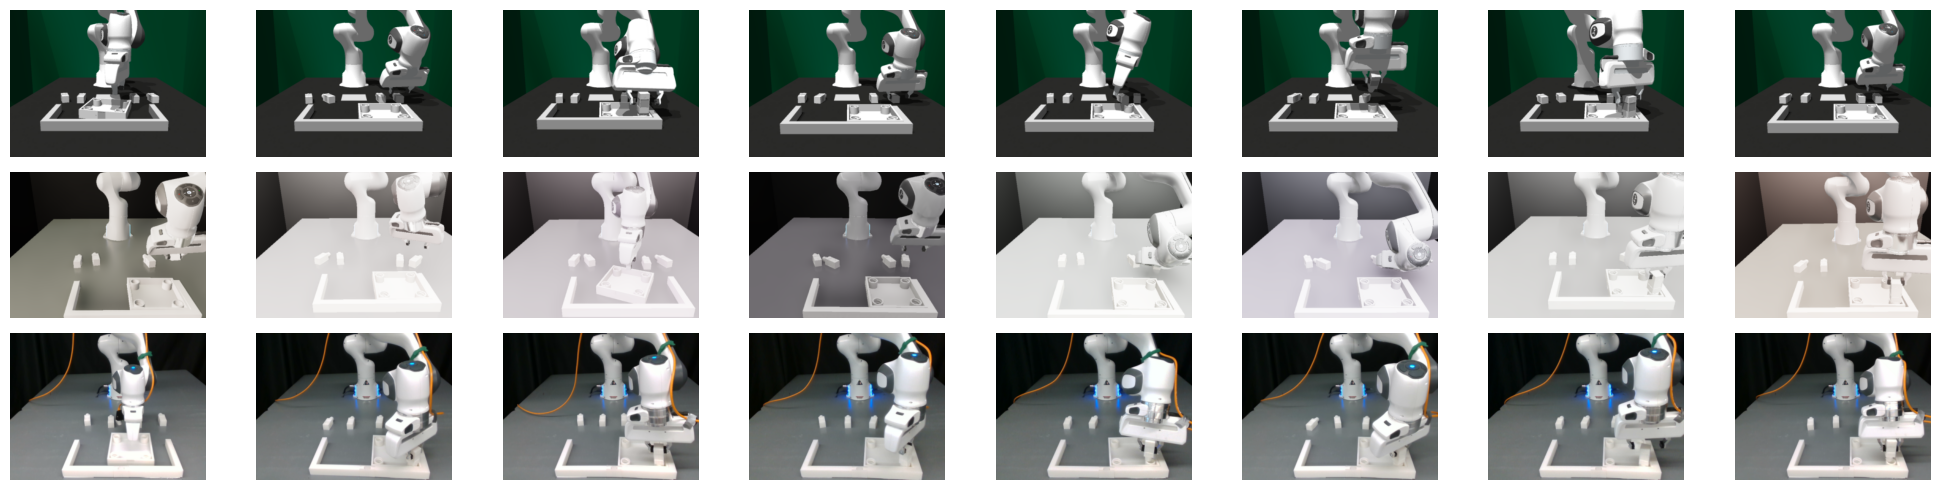

In [ ]:
# Sample 8 images from each dataset
sim1_indices = np.random.choice(sim1_imgs.shape[0], size=8, replace=False)
sim2_indices = np.random.choice(sim2_imgs.shape[0], size=8, replace=False)
real_indices = np.random.choice(real_imgs.shape[0], size=8, replace=False)

# Create a figure and axes
fig, axes = plt.subplots(3, 8, figsize=(20, 5))

# Display the sampled images
for i, idx in enumerate(sim1_indices):
    axes[0, i].imshow(sim1_imgs[idx])
    axes[0, i].axis('off')

for i, idx in enumerate(sim2_indices):
    axes[1, i].imshow(sim2_imgs[idx])
    axes[1, i].axis('off')

for i, idx in enumerate(real_indices):
    axes[2, i].imshow(real_imgs[idx])
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Load the encoder with pretrained weights
r3m = load_r3m("resnet18").cuda().eval()


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

The forward function of the r3m model looks like this:

```python
## Forward Call (im --> representation)
def forward(self, obs, num_ims = 1, obs_shape = [3, 224, 224]):
    if obs_shape != [3, 224, 224]:
        preprocess = nn.Sequential(
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    self.normlayer,
            )
    else:
        preprocess = nn.Sequential(
                    self.normlayer,
            )

    ## Input must be [0, 255], [3,244,244]
    obs = obs.float() /  255.0
    obs_p = preprocess(obs)
    h = self.convnet(obs_p)
    return h
```

which means that we need to pass it images that are not normalized, but have the channel dimension first (last is default in our data)

In [ ]:
# Assuming the encoder expects images of size (3, 224, 224) [0, 255]
random_input = torch.randint(0, 255, size=(1, 3, 224, 224))

# Pass the random data through the encoder
with torch.no_grad():
  output = r3m(random_input)

# Print the shape and data type of the output
print("Output shape:", output.shape)
print("Output data type:", output.dtype)
print(f"I.e., the embedding dimension of this resnet is {output.shape[1]}")

In [ ]:
# Sample 1000 images from each dataset
num_samples = 1000
sim1_indices = np.random.choice(sim1_imgs.shape[0], size=num_samples, replace=False)
sim2_indices = np.random.choice(sim2_imgs.shape[0], size=num_samples, replace=False)
real_indices = np.random.choice(real_imgs.shape[0], size=num_samples, replace=False)

# Create tensors to store the embeddings
sim1_embeddings = torch.zeros(num_samples, output.shape[1])
sim2_embeddings = torch.zeros(num_samples, output.shape[1])
real_embeddings = torch.zeros(num_samples, output.shape[1])

# Compute embeddings for the sampled images in batches, storing in pre-allocated tensors
batch_size = 200  # Adjust as needed

with torch.no_grad():
  for i in trange(0, num_samples, batch_size):
    # Process sim1 images in batches
    batch_indices = sim1_indices[i: i + batch_size]
    sim_batch = torch.tensor(sim1_imgs[batch_indices]).permute(0, 3, 1, 2).float().cuda()
    sim1_embeddings[i: i + batch_size] = r3m(sim_batch).cpu()

    # Process sim2 images in batches
    batch_indices = sim2_indices[i: i + batch_size]
    sim_batch = torch.tensor(sim2_imgs[batch_indices]).permute(0, 3, 1, 2).float().cuda()
    sim2_embeddings[i: i + batch_size] = r3m(sim_batch).cpu()

    # Process real images in batches
    batch_indices = real_indices[i: i + batch_size]
    real_batch = torch.tensor(real_imgs[batch_indices]).permute(0, 3, 1, 2).float().cuda()
    real_embeddings[i: i + batch_size] = r3m(real_batch).cpu()

# Embeddings are now stored in sim_embeddings and real_embeddings tensors
# Concatenate the embeddings and create labels
all_embeddings = torch.cat([sim1_embeddings, sim2_embeddings, real_embeddings]).cpu().numpy()
labels = np.concatenate([np.zeros(num_samples), np.ones(num_samples), np.ones(num_samples) * 2])

# Fit t-SNE on the embeddings
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(all_embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:num_samples, 0], embeddings_2d[:num_samples, 1], label='Sim (low)', alpha=0.5)
plt.scatter(embeddings_2d[num_samples:2*num_samples, 0], embeddings_2d[num_samples:2*num_samples, 1], label='Sim (med)', alpha=0.5)
plt.scatter(embeddings_2d[2*num_samples:, 0], embeddings_2d[2*num_samples:, 1], label='Real', alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
